# Step 1: Load and Inspect the Data
Check for missing values, data types, and get a summary of the dataset.

In [1]:
import pandas as pd

# Load the dataset
file_path = '/content/synthetic_pcos_dataset.csv'
data = pd.read_csv(file_path)

# Overview of the data
print(data.head())
print(data.info())
print(data.describe())

# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:\n", missing_values)


   Age BirthControl MenstrualCycle Hirsutism   BMI Galactorrhea  \
0   19           No     25-34 days        No  30.5           No   
1   38           No     25-34 days       Yes  18.1           No   
2   14           No     25-34 days       Yes  24.4           No   
3   26          Yes     25-34 days        No  32.2           No   
4   29          Yes     35-60 days        No  29.6           No   

         Ultrasound  BloodSugar  FreeTestosterone  DHEAS  LH_FSH_Ratio  AMH  \
0     PCOS findings          92              2.27   57.9          0.73  2.6   
1  No PCOS findings         157              1.33  103.8          2.41  1.7   
2     PCOS findings         228              3.16  140.4          0.98  1.5   
3  No PCOS findings         241              1.30  284.2          2.12  5.3   
4     PCOS findings         128              2.97  251.3          1.50  1.5   

   FastingInsulin  FastingGlucose   TSH  Prolactin  Score PCOS_Likelihood  
0            15.8             105  1.12       

In [3]:
# Check unique values in the MenstrualCycle column
print(data['MenstrualCycle'].unique())

# Summary statistics for MenstrualCycle
print(data['MenstrualCycle'].value_counts())


['25-34 days' '35-60 days' 'Variable' '<25 days' '>60 days']
MenstrualCycle
25-34 days    1202
35-60 days     627
<25 days       588
>60 days       293
Variable       290
Name: count, dtype: int64


In [4]:
# Replace 'Variable' with 'Irregular' in the MenstrualCycle column
data['MenstrualCycle'] = data['MenstrualCycle'].replace({'Variable': 'Irregular'})

# Step 2: Analyze Feature Distributions
Understand the distributions of numerical and categorical features

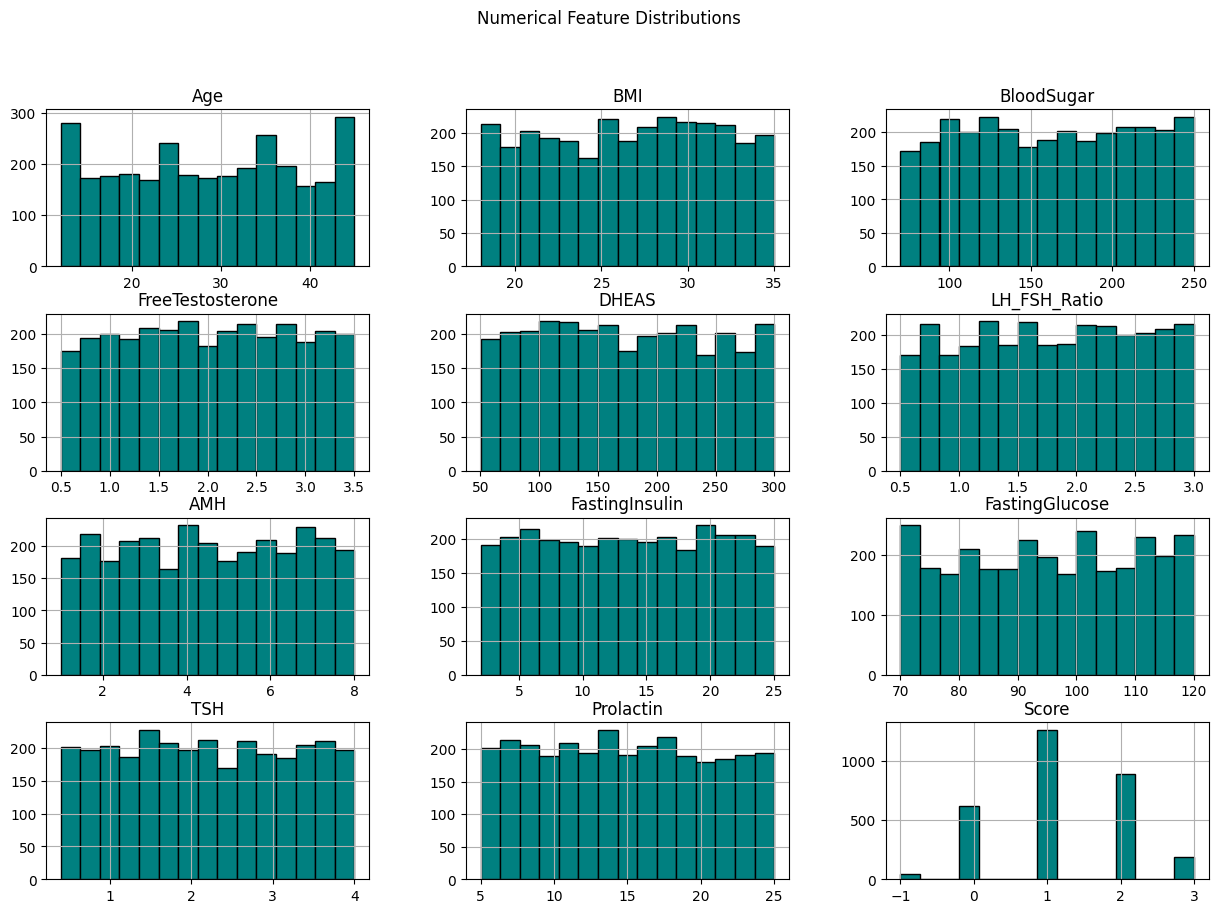

<ipython-input-5-cfdb26c0ed7c>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=feature, palette='Set2')


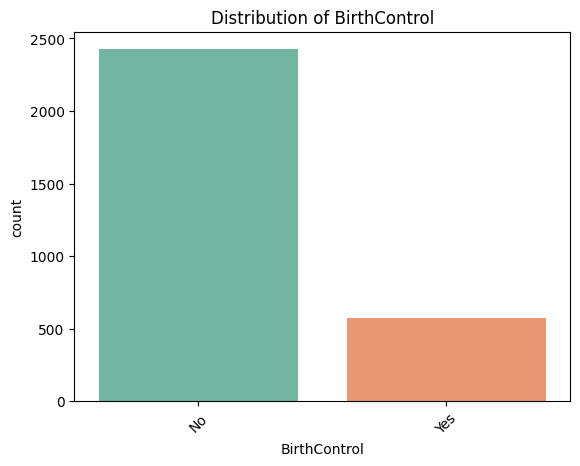

<ipython-input-5-cfdb26c0ed7c>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=feature, palette='Set2')


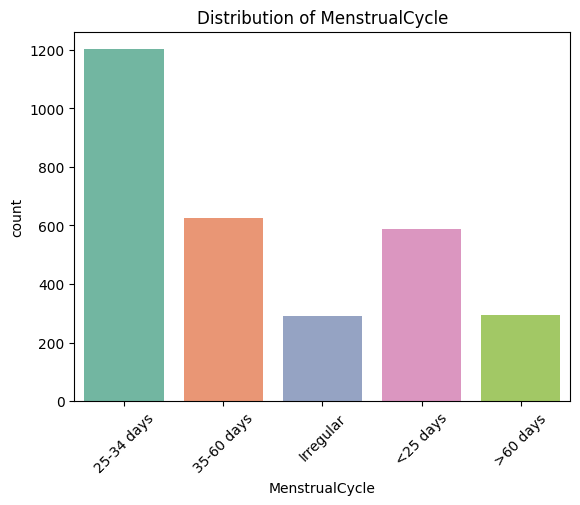

<ipython-input-5-cfdb26c0ed7c>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=feature, palette='Set2')


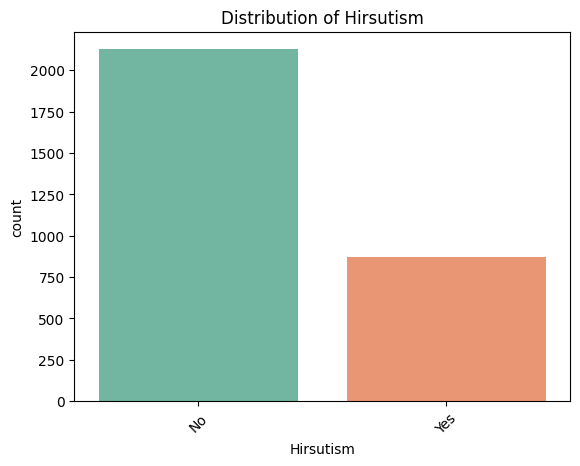

<ipython-input-5-cfdb26c0ed7c>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=feature, palette='Set2')


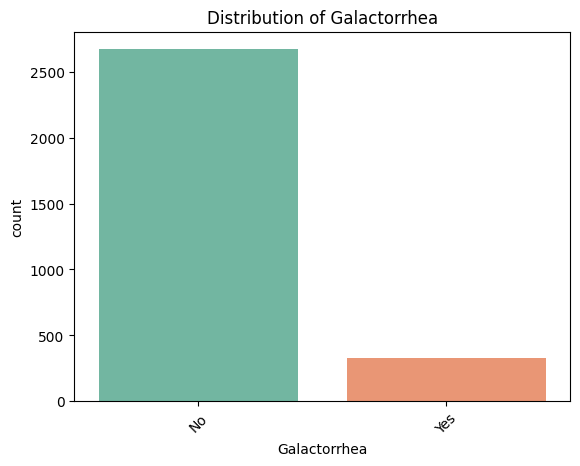

<ipython-input-5-cfdb26c0ed7c>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=feature, palette='Set2')


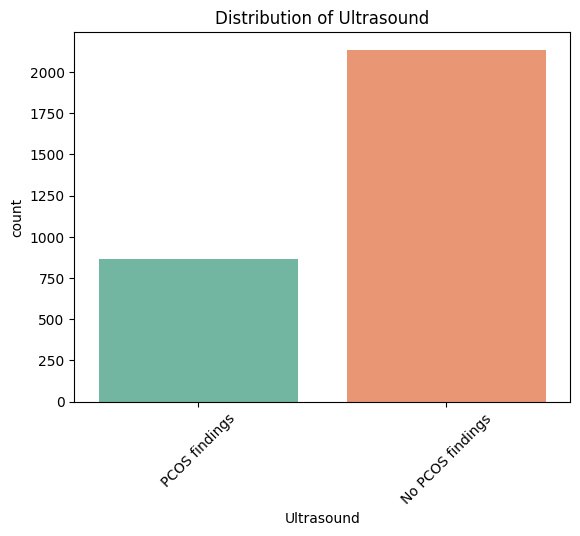

<ipython-input-5-cfdb26c0ed7c>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=feature, palette='Set2')


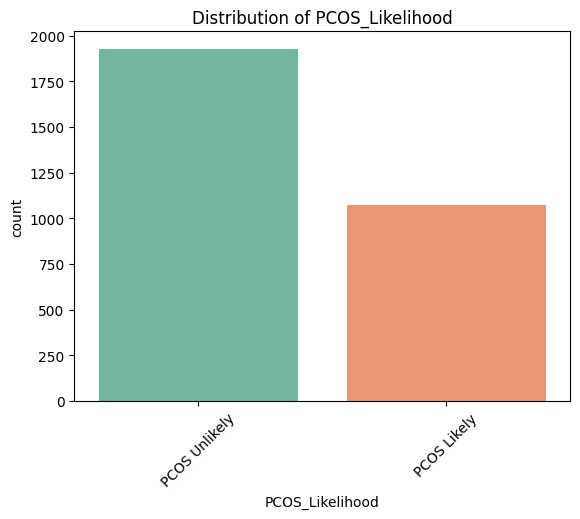

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical features
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_features].hist(bins=15, figsize=(15, 10), color='teal', edgecolor='black')
plt.suptitle('Numerical Feature Distributions')
plt.show()

# Plot categorical features
categorical_features = data.select_dtypes(include=['object']).columns
for feature in categorical_features:
    sns.countplot(data=data, x=feature, palette='Set2')
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
    plt.show()


# Step 3: Handle Missing Values
Impute or drop missing values based on the feature importance.

In [7]:
# Impute missing values for numeric columns with mean
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Impute missing values for non-numeric columns with the most frequent value
non_numeric_columns = data.select_dtypes(exclude=['float64', 'int64']).columns
data[non_numeric_columns] = data[non_numeric_columns].fillna(data[non_numeric_columns].mode().iloc[0])

# Verify no missing values remain
print("Missing Values After Imputation:\n", data.isnull().sum())



Missing Values After Imputation:
 Age                 0
BirthControl        0
MenstrualCycle      0
Hirsutism           0
BMI                 0
Galactorrhea        0
Ultrasound          0
BloodSugar          0
FreeTestosterone    0
DHEAS               0
LH_FSH_Ratio        0
AMH                 0
FastingInsulin      0
FastingGlucose      0
TSH                 0
Prolactin           0
Score               0
PCOS_Likelihood     0
dtype: int64


# Step 4: Encode Categorical Features
Convert categorical features into numerical values.

In [8]:
from sklearn.preprocessing import LabelEncoder

# Apply LabelEncoder to all categorical features
for feature in categorical_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])

print("Categorical features after encoding:\n", data[categorical_features].head())


Categorical features after encoding:
    BirthControl  MenstrualCycle  Hirsutism  Galactorrhea  Ultrasound  \
0             0               0          0             0           1   
1             0               0          1             0           0   
2             0               0          1             0           1   
3             1               0          0             0           0   
4             1               1          0             0           1   

   PCOS_Likelihood  
0                1  
1                1  
2                1  
3                1  
4                0  


# Step 5: Split Data Into Training and Testing Sets
Divide the dataset for model training and evaluation.

In [9]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = data.drop(columns=['PCOS_Likelihood'])  # Replace with actual target column name
y = data['PCOS_Likelihood']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (2400, 17)
Testing set size: (600, 17)


# Step 6: Train a Simple Machine Learning Model
Use a Random Forest Classifier for initial predictions.

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       215
           1       1.00      1.00      1.00       385

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



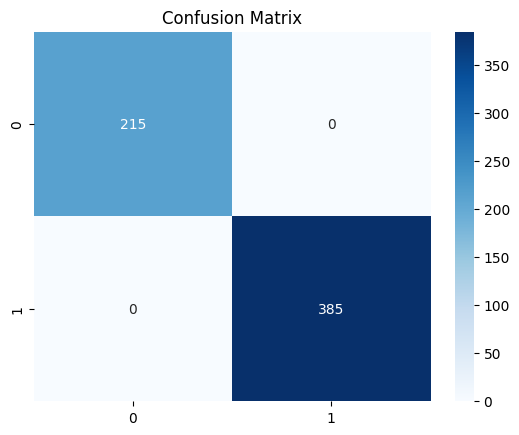

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


# Cross-Validation

In [16]:
# Import necessary libraries
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest model
model = RandomForestClassifier(random_state=42)

# Perform cross-validation (ensure X and y are defined earlier)
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')  # 5-fold cross-validation

# Display results
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())
print("Standard deviation of accuracy:", scores.std())


Cross-validation scores: [1. 1. 1. 1. 1.]
Mean accuracy: 1.0
Standard deviation of accuracy: 0.0


In [17]:
# Split data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model on training data
model.fit(X_train, y_train)

# Evaluate on test data
test_accuracy = model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)


Test Accuracy: 1.0


In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Define preprocessing for numerical columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler())  # Standardize features
])

# Combine preprocessing for numerical features
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features)
])

# Integrate preprocessing with the model in a pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Cross-validate the pipeline
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
print("Cross-validation accuracy (pipeline):", cv_scores)


Cross-validation accuracy (pipeline): [1. 1. 1. 1. 1.]


## Fit the pipeline

In [23]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'BMI', 'BloodSugar', 'FreeTestosterone', 'DHEAS', 'LH_FSH_Ratio',
       'AMH', 'FastingInsulin', 'FastingGlucose', 'TSH', 'Prolactin', 'Score'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

# Feature Importance

Feature Importances:
Score: 0.8146
BMI: 0.1161
LH_FSH_Ratio: 0.0080
FreeTestosterone: 0.0076
DHEAS: 0.0073
AMH: 0.0073
Prolactin: 0.0071
FastingInsulin: 0.0070
TSH: 0.0068
BloodSugar: 0.0067
Age: 0.0058
FastingGlucose: 0.0056


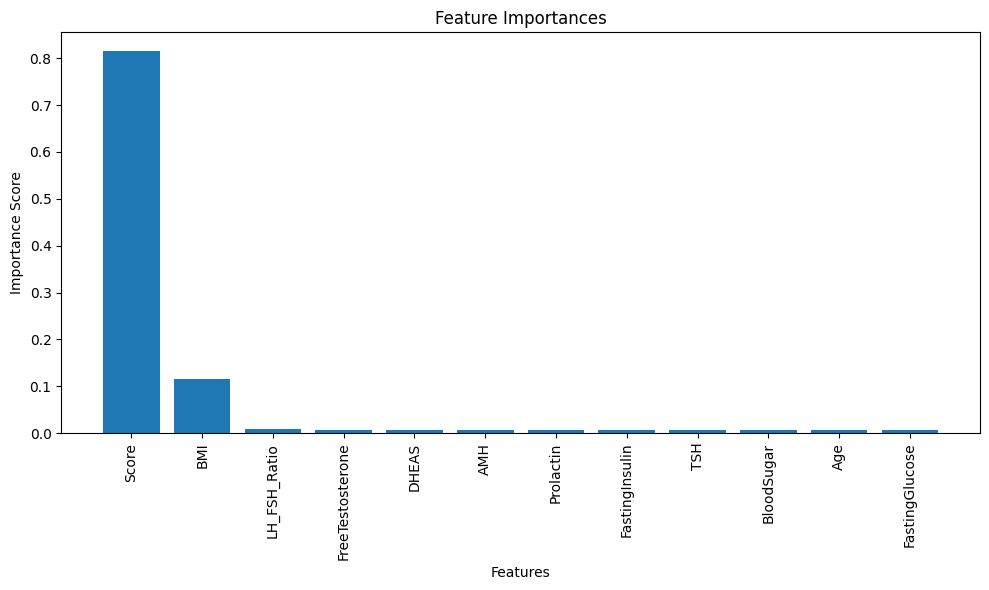

In [24]:
# Get feature importances from the RandomForestClassifier
importances = pipeline.named_steps['classifier'].feature_importances_

# Get the feature names from the preprocessor step
feature_names = pipeline.named_steps['preprocessor'].transformers_[0][2]

# Sort features by importance
sorted_indices = np.argsort(importances)[::-1]

# Display the sorted feature importances
print("Feature Importances:")
for i in sorted_indices:
    print(f"{feature_names[i]}: {importances[i]:.4f}")

# Optional: Visualize feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[sorted_indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in sorted_indices], rotation=90)
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


In [20]:
print(pipeline.named_steps)


{'preprocessor': ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 Index(['Age', 'BMI', 'BloodSugar', 'FreeTestosterone', 'DHEAS', 'LH_FSH_Ratio',
       'AMH', 'FastingInsulin', 'FastingGlucose', 'TSH', 'Prolactin', 'Score'],
      dtype='object'))]), 'classifier': RandomForestClassifier(random_state=42)}


# Hyperparameter Tuning
We will optimize the RandomForestClassifier to ensure the model performs at its best. Below is an example of how to use GridSearchCV to find the best combination of hyperparameters:

In [25]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Set up the grid search
grid_search = GridSearchCV(
    estimator=pipeline.named_steps['classifier'],
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    verbose=2,
    n_jobs=-1  # Use all available processors
)

# Fit the grid search to the pipeline
pipeline.named_steps['classifier'] = grid_search.fit(X, y).best_estimator_

# Display the best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validation Accuracy: 1.0


In [26]:
pipeline.named_steps['classifier'] = grid_search.best_estimator_

# Fit the pipeline with the entire dataset
pipeline.fit(X, y)

print("Pipeline updated and refitted with optimized parameters.")


Pipeline updated and refitted with optimized parameters.


In [27]:
from sklearn.metrics import classification_report, accuracy_score

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate performance
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       216
           1       1.00      1.00      1.00       384

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



# INTERPRETE RESULTS

Feature Importances (Optimized Model):
AMH: 0.8417
BirthControl: 0.1010
Hirsutism: 0.0066
BMI: 0.0065
DHEAS: 0.0062
LH_FSH_Ratio: 0.0061
BloodSugar: 0.0061
Galactorrhea: 0.0058
Ultrasound: 0.0054
MenstrualCycle: 0.0054
FreeTestosterone: 0.0046
Age: 0.0046


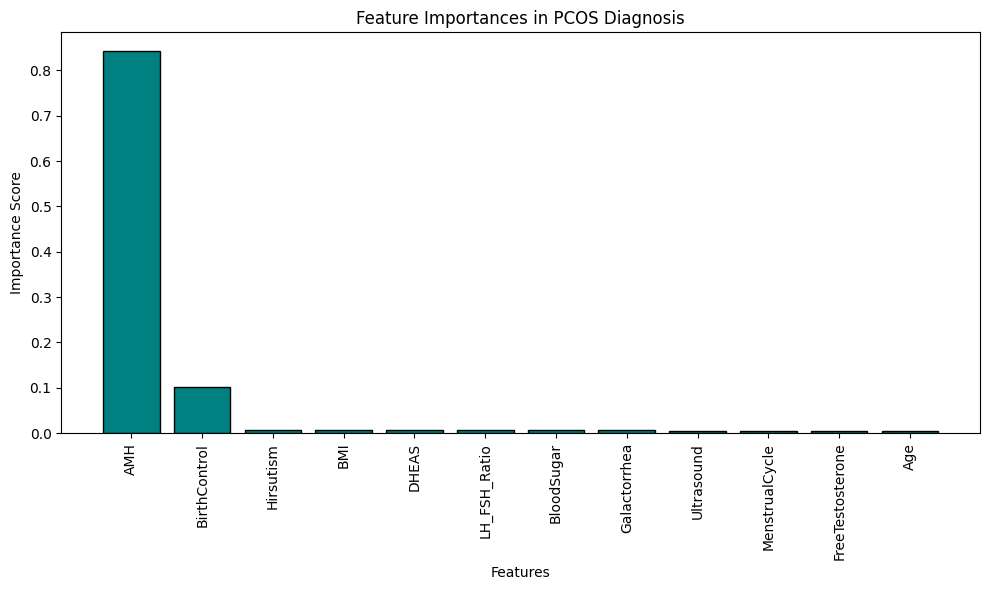

In [30]:
importances = pipeline.named_steps['classifier'].feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(importances)[::-1]

print("Feature Importances (Optimized Model):")
for i in sorted_indices:
    print(f"{feature_names[i]}: {importances[i]:.4f}")


# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[sorted_indices], color='teal', edgecolor='black')
plt.xticks(range(len(importances)), [feature_names[i] for i in sorted_indices], rotation=90)
plt.title("Feature Importances in PCOS Diagnosis")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


# Deploy the Model
### 1. Save the Pipeline for Deployment

In [31]:
import joblib

# Save the pipeline
model_file = "pcos_diagnosis_pipeline.pkl"
joblib.dump(pipeline, model_file)
print(f"Model saved to {model_file}")


Model saved to pcos_diagnosis_pipeline.pkl


### To load the model later for predictions:

In [ ]:
# Load the pipeline
loaded_pipeline = joblib.load(model_file)
print("Model loaded successfully.")
